# Auto-Encoder

Basic Auto-Encoder network.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
# Hyperparameters
learning_rate = 1e-2
training_steps = int(5e4)
batch_size = 256

# Network parameters
input_size = 784 # MNIST images are 28x28
num_hidden_1 = 256
num_hidden_2 = 128

## Model

In [4]:
# Fully connected layer
def fully_connected(x, W_shape, b_shape):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
    return tf.nn.sigmoid(tf.add(tf.matmul(x, W), b))

# Encoder
def encoder(x):
    # Encoder hidden layer with sigmoid activation #1
    layer_1 = fully_connected(x, [input_size, num_hidden_1], [num_hidden_1])
    
    # Encoder hidden layer with sigmoid activation #2
    layer_2 = fully_connected(layer_1, [num_hidden_1, num_hidden_2], [num_hidden_2])
    
    return layer_2

# Decider
def decoder(x):
    # Decoder hidden layer with sigmoid activation #1
    layer_1 = fully_connected(x, [num_hidden_2, num_hidden_1], [num_hidden_1])
    
    # Decoder hidden layer with sigmoid activation #2
    layer_2 = fully_connected(layer_1, [num_hidden_1, input_size], [input_size])
    
    return layer_2

# Input placeholder
input_images = tf.placeholder("float", [None, input_size])

# Model
encoder_op = encoder(input_images) # Encoder
decoder_op = decoder(encoder_op) # Decoder

# Prediction
y_pred = decoder_op
# Labels, same as input data
y_true = input_images

In [5]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) # MSE
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss) # RMSProp

# Initialize the variables
init = tf.global_variables_initializer()

## Training

In [6]:
# New session
sess = tf.Session()

# Initialize
sess.run(init)

for i in range(training_steps):
    # Next batch of training data
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    # Optimization step
    _, l = sess.run([optimizer, loss], feed_dict={input_images: batch_x})
    
    # Output loss every 1000 steps
    if i % 1000 == 0:
        print('Step %i: Minibatch Loss: %f' % (i+1, l))

Step 1: Minibatch Loss: 0.421842
Step 1001: Minibatch Loss: 0.137560
Step 2001: Minibatch Loss: 0.118953
Step 3001: Minibatch Loss: 0.108551
Step 4001: Minibatch Loss: 0.101457
Step 5001: Minibatch Loss: 0.097633
Step 6001: Minibatch Loss: 0.091006
Step 7001: Minibatch Loss: 0.089541
Step 8001: Minibatch Loss: 0.085673
Step 9001: Minibatch Loss: 0.083013
Step 10001: Minibatch Loss: 0.075191
Step 11001: Minibatch Loss: 0.073606
Step 12001: Minibatch Loss: 0.072291
Step 13001: Minibatch Loss: 0.072360
Step 14001: Minibatch Loss: 0.069160
Step 15001: Minibatch Loss: 0.066562
Step 16001: Minibatch Loss: 0.067286
Step 17001: Minibatch Loss: 0.064414
Step 18001: Minibatch Loss: 0.060325
Step 19001: Minibatch Loss: 0.062996
Step 20001: Minibatch Loss: 0.057997
Step 21001: Minibatch Loss: 0.058284
Step 22001: Minibatch Loss: 0.057166
Step 23001: Minibatch Loss: 0.057991
Step 24001: Minibatch Loss: 0.057020
Step 25001: Minibatch Loss: 0.057513
Step 26001: Minibatch Loss: 0.055703
Step 27001: Mi

## Visualization

Original Images


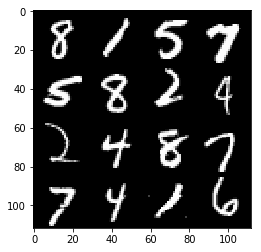

Reconstructed Images


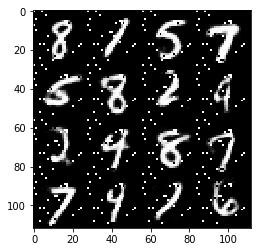

In [7]:
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    recon = sess.run(decoder_op, feed_dict={input_images: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28,
                    j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28,
                     j * 28:(j + 1) * 28] = recon[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()